# 다중 출력 회귀

- 타겟변수 y가 하나의 값을 갖는 것이 아니라 다수의 값을 갖는 경우
- 회귀와 분류
 - (회귀)출력이 벡터 형태로 다수의 아나로그 값을 갖는 경우
 - (분류)출력이 남여 구분이 아니라 국적 구분도 해야 하는 경우(multi-class output)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import scipy.stats
from numpy.random import rand, randn

## 데이터 생성
- 시스템의 입력과 출력 데이터 생성 함수

In [4]:
def get_random_x(n_steps=30):
    level = 0.5 + rand() # 0.5 ~ 1.5 사이의 임의의 레벨 선택
    x = scipy.stats.norm(3, 1) # 평균 3, 표준편차가 1의 정규 분포형태의 신호 생성
    xs = np.linspace(0,6,n_steps)
    in_x = level*(x.pdf(xs))
    return in_x

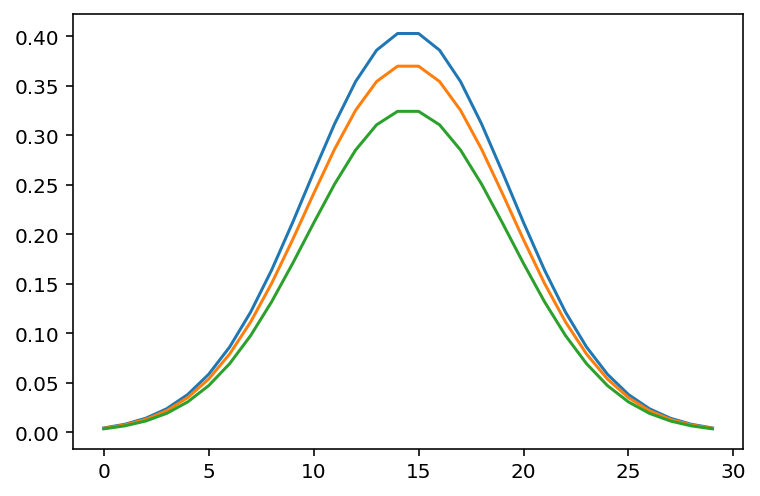

In [34]:
# 랜덤한 입력 신호 생성
plt.plot(get_random_x())
plt.plot(get_random_x())
plt.plot(get_random_x())

In [35]:
get_random_x()

array([0.00621572, 0.01131771, 0.01974399, 0.03300052, 0.05284649,
       0.08108136, 0.1191888 , 0.16786469, 0.22651281, 0.29284358,
       0.3627339 , 0.43047715, 0.48946492, 0.53321524, 0.55653571,
       0.55653571, 0.53321524, 0.48946492, 0.43047715, 0.3627339 ,
       0.29284358, 0.22651281, 0.16786469, 0.1191888 , 0.08108136,
       0.05284649, 0.03300052, 0.01974399, 0.01131771, 0.00621572])

In [37]:
# 임의의 출력을 얻는 함수 (4개를 얻는다고 가정) 
def get_4_y(x):
    y1 = x.sum() + 0.3*randn()      # random 노이즈를 삽입하여 맞추기 어렵게 만듦
    y2 = (x**2).sum() + 0.2*randn()
    y3 = (x**3).sum() + 0.2*randn()
    y4 = (x**4).sum() + 0.2*randn()
    return y1, y2, y3, y4

In [38]:
sample = get_random_x()
print('X=', sample)
print('y=',get_4_y(sample))

X= [0.00570988 0.01039665 0.01813718 0.03031487 0.04854574 0.0744828
 0.10948898 0.15420353 0.20807876 0.2690114  0.33321391 0.39544408
 0.44963131 0.48982114 0.51124375 0.51124375 0.48982114 0.44963131
 0.39544408 0.33321391 0.2690114  0.20807876 0.15420353 0.10948898
 0.0744828  0.04854574 0.03031487 0.01813718 0.01039665 0.00570988]
y= (5.952731962050585, 2.1076474897089548, 1.009078227893787, 0.07310990686791641)


In [24]:
# 샘플 데이터 X, y 생성
N = 200
samples = []
multi_y = []
for i in range(N):
    x = get_random_x()
    samples.append(x)
    multi_y.append(get_4_y(x))
X = np.array(samples)
y = np.array(multi_y)

In [25]:
X.shape, y.shape

((200, 30), (200, 4))

In [18]:
X[:3], y[:3]

(array([[0.00638528, 0.01162645, 0.02028259, 0.03390075, 0.0542881 ,
         0.0832932 , 0.12244017, 0.17244391, 0.2326919 , 0.30083212,
         0.372629  , 0.44222023, 0.50281715, 0.54776094, 0.57171758,
         0.57171758, 0.54776094, 0.50281715, 0.44222023, 0.372629  ,
         0.30083212, 0.2326919 , 0.17244391, 0.12244017, 0.0832932 ,
         0.0542881 , 0.03390075, 0.02028259, 0.01162645, 0.00638528],
        [0.00466407, 0.00849242, 0.01481521, 0.02476245, 0.03965419,
         0.06084067, 0.08943518, 0.12595989, 0.16996743, 0.21973976,
         0.27218305, 0.32301526, 0.36727765, 0.40010639, 0.41760527,
         0.41760527, 0.40010639, 0.36727765, 0.32301526, 0.27218305,
         0.21973976, 0.16996743, 0.12595989, 0.08943518, 0.06084067,
         0.03965419, 0.02476245, 0.01481521, 0.00849242, 0.00466407],
        [0.00641933, 0.01168844, 0.02039074, 0.03408152, 0.05457759,
         0.08373735, 0.12309307, 0.17336344, 0.23393271, 0.30243628,
         0.374616  , 0.44457832,

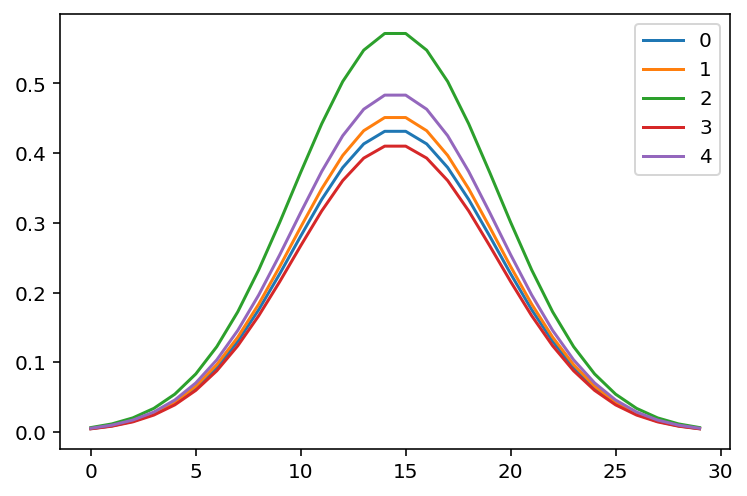

In [26]:
for i in range(5):
    plt.plot(X[i], label=str(i))
    plt.legend()

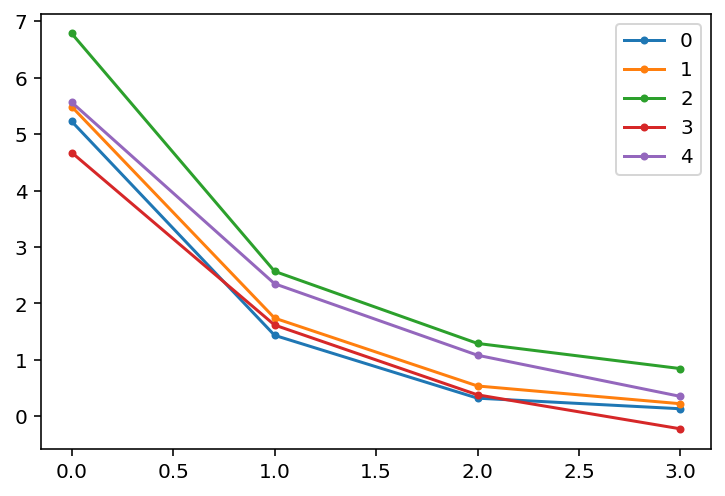

In [27]:
for i in range(5):
    plt.plot(y[i], label=str(i), marker='.')
    plt.legend()

### 모든 입력 데이터를 사용한 다중회귀 예측

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

## 컬럼별로 r2 구하기
- 목적 변수에 4개의 컬럼(y1, y2, y3, y4) 이 있다
- 각 컬럼별로 r2 구하기

In [30]:
y_pred = rfr.predict(X_test)
r2_score(y_test, y_pred, multioutput="raw_values")

array([0.9374821 , 0.85938876, 0.75421284, 0.34118994])

In [72]:
# 과제: 노이지가 많아서 y를 생성할 때 노이지 레벨을 0.1 --> 0.2 로 바꾸어본다.
# 실제값과 예측치를 비교해서 그려보시오 (y_test, y_pred 비교): 4개가 있다!

In [33]:
y_test.shape

(50, 4)

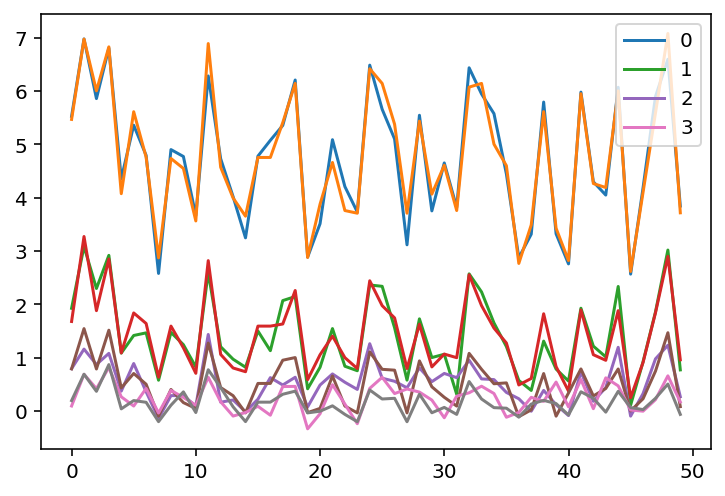

In [81]:
for i in range(4):
    plt.plot(y_test[:,i], label=str(i))
    plt.plot(y_pred[:,i])
plt.legend()

In [73]:
r2_score(y_test, y_pred, multioutput="raw_values").mean()

0.6635203242066118

In [61]:
y_test

array([[ 2.67298265e+00,  7.07436175e-01,  1.21031156e-01,
        -4.55311932e-02],
       [ 6.07578207e+00,  2.15500034e+00,  8.00574429e-01,
         2.84685818e-01],
       [ 4.19256456e+00,  9.92225206e-01,  8.16536830e-02,
        -2.67946244e-02],
       [ 4.71890596e+00,  1.38839745e+00,  5.07109083e-01,
         2.86452147e-01],
       [ 3.56919876e+00,  7.03861106e-01,  2.52961023e-01,
        -6.80134605e-02],
       [ 6.82300164e+00,  2.69693805e+00,  1.37750656e+00,
         5.13036138e-01],
       [ 4.43731076e+00,  1.24697787e+00,  2.22123415e-01,
        -2.00935244e-04],
       [ 3.33642645e+00,  6.27034437e-01,  1.56595333e-01,
        -2.06688899e-03],
       [ 6.38092548e+00,  2.52557718e+00,  1.09043132e+00,
         4.71581118e-01],
       [ 2.75191608e+00,  4.72150567e-01, -8.87795417e-02,
        -1.08845417e-01],
       [ 7.23813636e+00,  3.09946095e+00,  1.57149211e+00,
         7.74352205e-01],
       [ 6.05432927e+00,  2.22433577e+00,  8.56198079e-01,
      

In [60]:
y_pred

array([[ 2.51842943e+00,  3.74998825e-01, -1.06782616e-03,
        -9.35067503e-04],
       [ 6.11585884e+00,  2.09258089e+00,  8.92205037e-01,
         3.52331282e-01],
       [ 4.12778941e+00,  9.73538917e-01,  2.35902570e-01,
         1.80581041e-01],
       [ 4.85114516e+00,  1.36281700e+00,  5.63528594e-01,
         1.12154017e-01],
       [ 3.71979707e+00,  6.48097958e-01,  1.35850373e-01,
         4.13077376e-02],
       [ 6.68972343e+00,  2.65783493e+00,  1.22220884e+00,
         5.81490694e-01],
       [ 4.59408459e+00,  1.20508310e+00,  3.20039804e-01,
        -3.93647147e-02],
       [ 3.20251780e+00,  6.25209313e-01,  8.63813328e-02,
         4.75688094e-02],
       [ 6.49282223e+00,  2.39086320e+00,  8.81941292e-01,
         6.08513856e-01],
       [ 2.71569594e+00,  4.52062660e-01,  1.73185685e-01,
         4.64019766e-02],
       [ 7.24516446e+00,  3.08131926e+00,  1.54669991e+00,
         8.51320920e-01],
       [ 6.21214044e+00,  2.19218070e+00,  7.76957309e-01,
      

In [59]:
# 컬럼별 r2의 평균을 보여준다
r2_score(y_test, y_pred)

0.9153925512308146

# 다중 분류
- multi-class output 모델
- y로 단일 값이 아니라 아래와 같이 다중 값을 사용
 - multi_y = np.c_[y1, y2] 또는
 - multi_y = np.stack((y1,y2)).T 사용